In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#data_cleaning

In [3]:
#dont need user id and gender so:
dataset = dataset.drop(columns=["User ID","Gender"])
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x_input = dataset.iloc[:,:-1]
y_output = dataset["Purchased"]

In [6]:
#lets scale the data:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
sc.fit(x_input)

StandardScaler()

In [9]:
ar = sc.transform(x_input)

In [10]:
x_input = pd.DataFrame(ar,columns=x_input.columns)

In [11]:
#scaled input data:
x_input

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


#train_test

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x_input,y_output,test_size=0.2,random_state=40)

# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier()

In [15]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
dt.score(x_test,y_test)*100

88.75

In [17]:
# the model is 88.75% accurate

In [19]:
dt.predict([[20,46000]])

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [25]:
#plotting decision region:
from mlxtend.plotting import plot_decision_regions

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

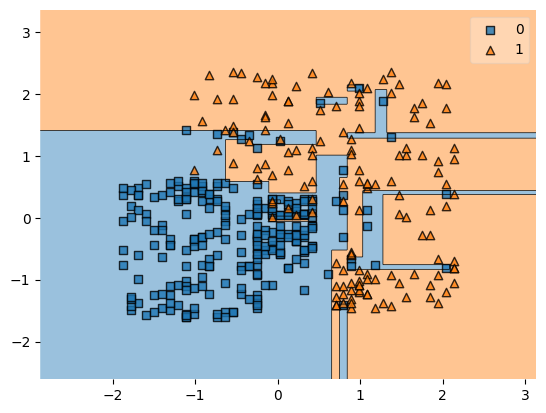

In [27]:
plot_decision_regions(x_input.to_numpy(),y_output.to_numpy(),clf=dt)

# plotting tree

In [20]:
from sklearn.tree import plot_tree

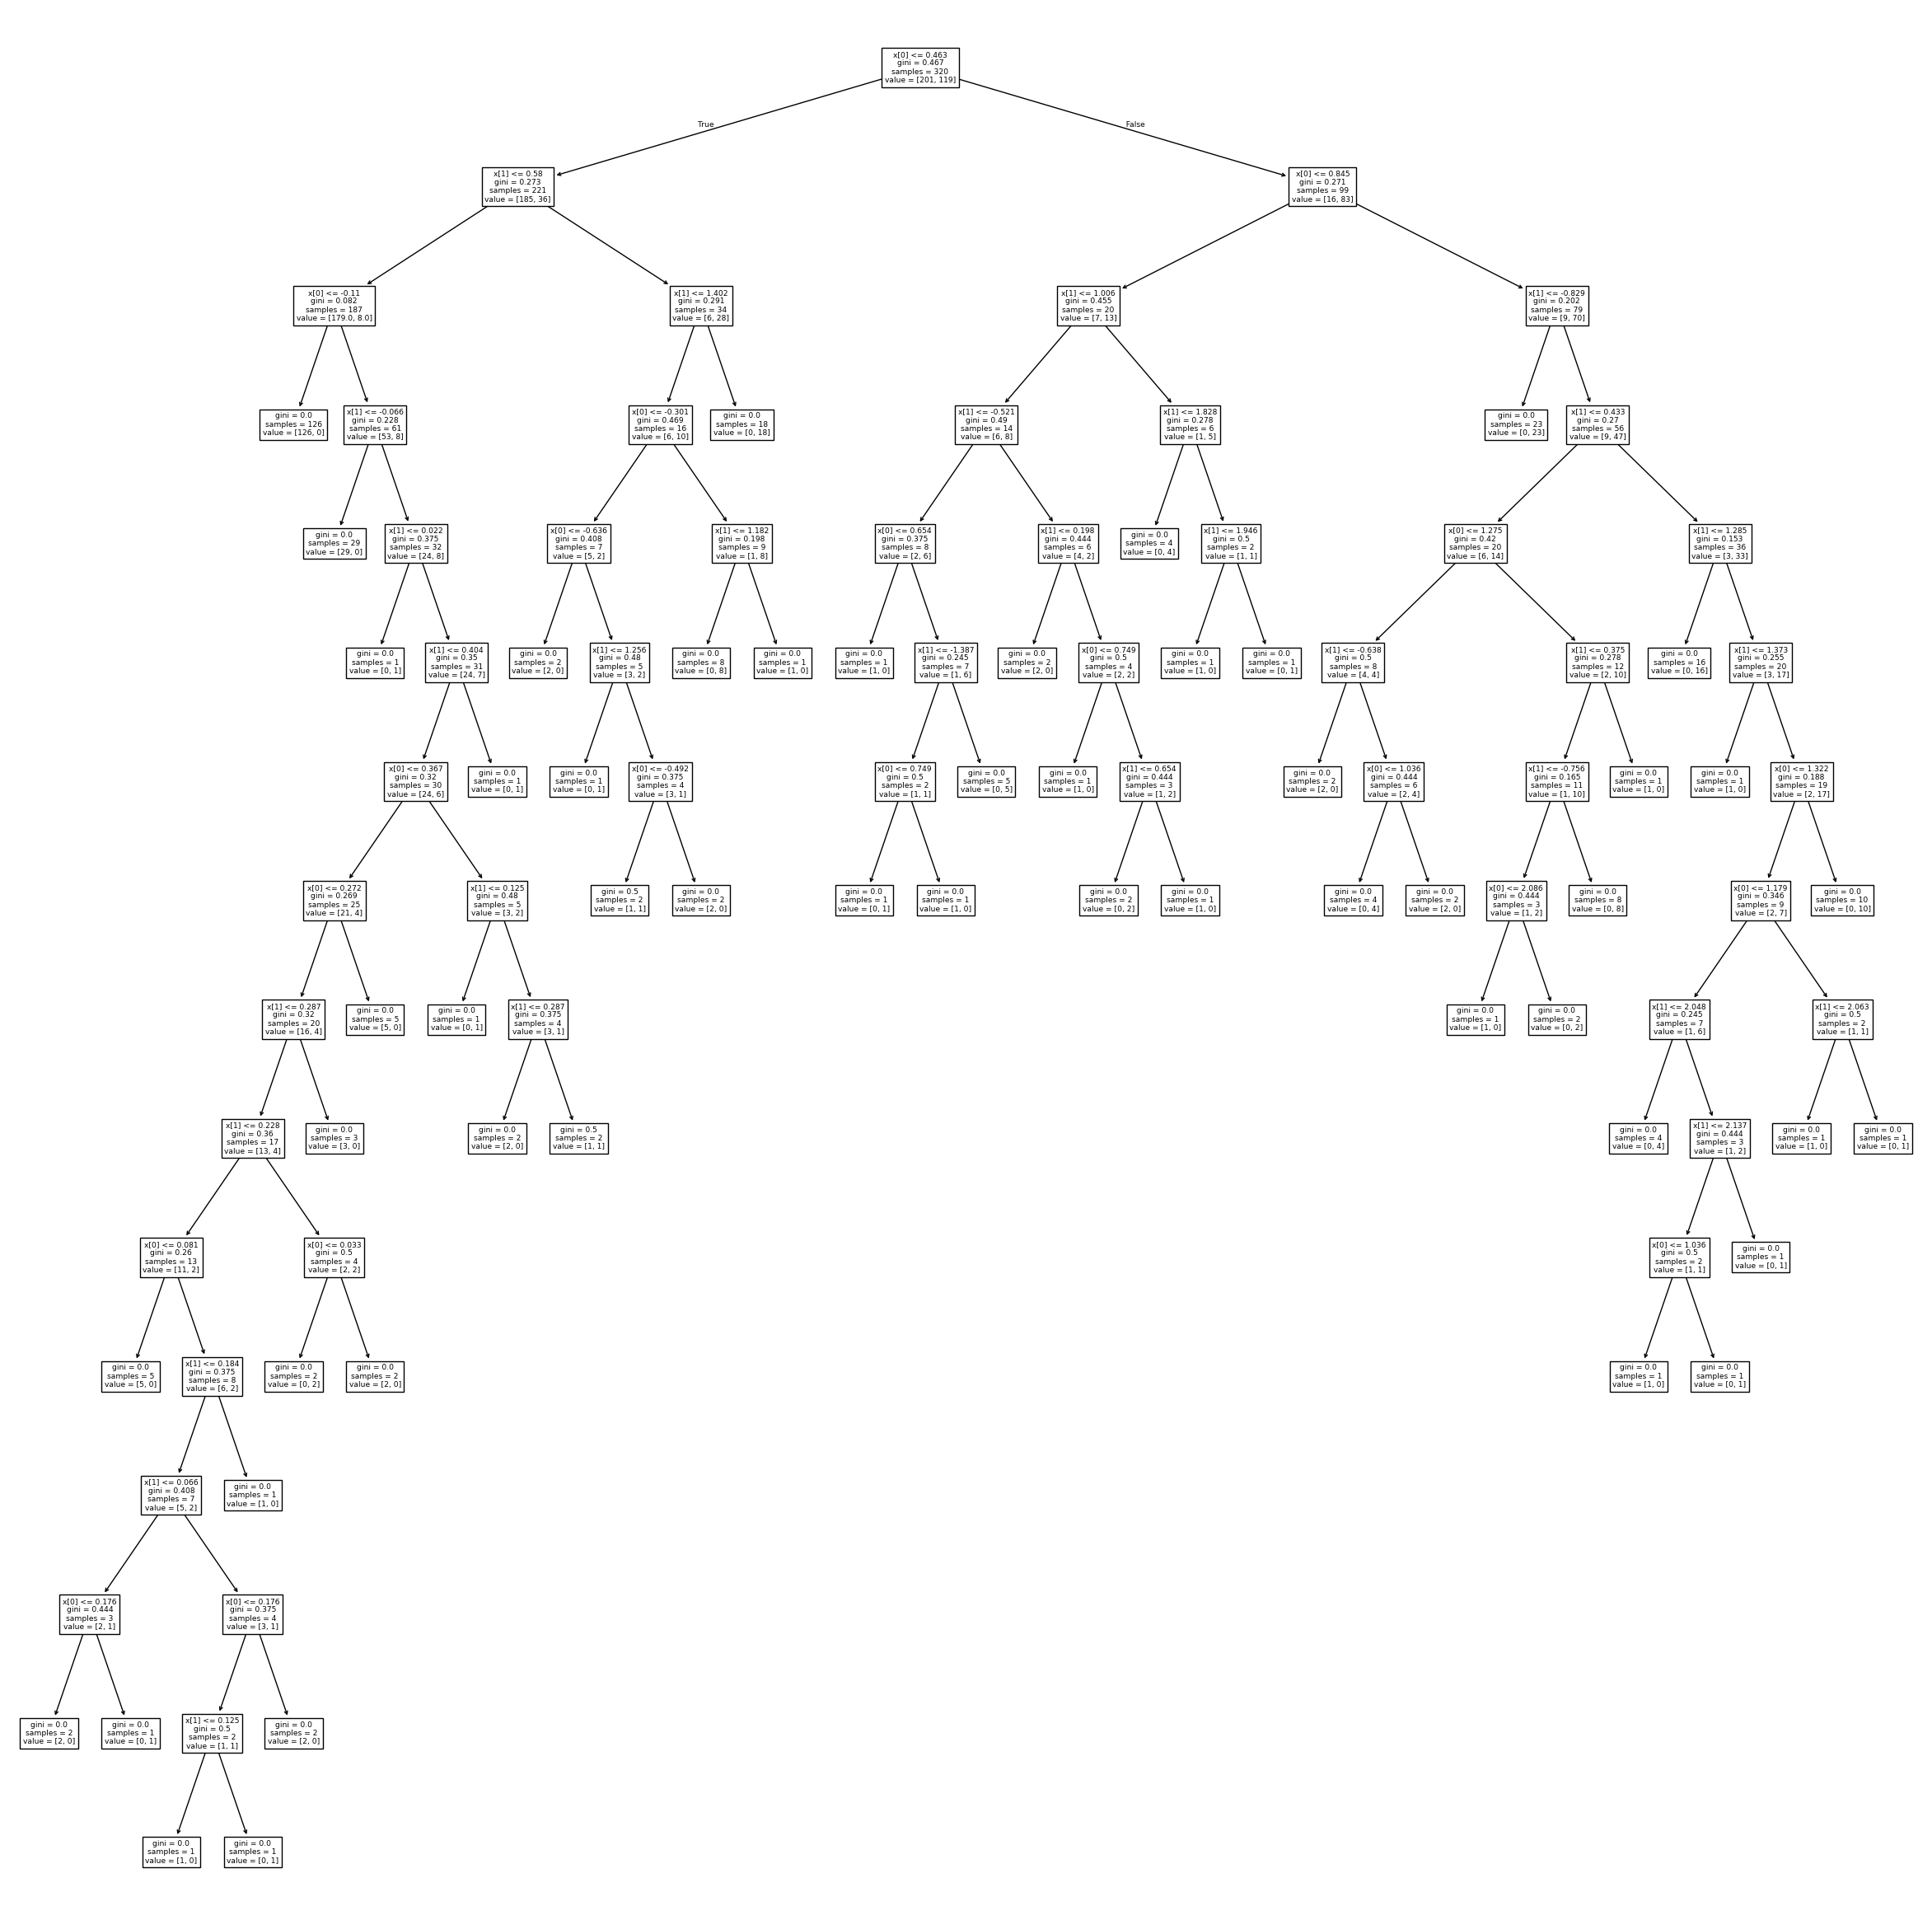

In [24]:
plt.figure(figsize=(30,30))
plot_tree(dt)
plt.savefig("dt.jpg")
plt.show()